In [311]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [313]:
df = pd.read_csv('ResultAnalysis.csv')

In [315]:
print(" Column Names:")
print(df.columns.tolist())

print("\n Data Types:")
print(df.dtypes)

 Column Names:
['Stud No', 'Roll No', 'Name', 'HMTS 3201', 'INCO 3016', 'CSEN 3201', 'CSEN 3202', 'CSEN 3233', 'CHEN 3221', 'CSEN3251', 'CSEN3252', 'CSEN3293', 'SGPA5', 'SGPA6', 'YGPA3', 'RESULT']

 Data Types:
Stud No        int64
Roll No        int64
Name          object
HMTS 3201     object
INCO 3016     object
CSEN 3201     object
CSEN 3202     object
CSEN 3233     object
CHEN 3221     object
CSEN3251      object
CSEN3252      object
CSEN3293      object
SGPA5        float64
SGPA6        float64
YGPA3        float64
RESULT        object
dtype: object


In [317]:
print(df.isnull().sum())

Stud No      0
Roll No      0
Name         0
HMTS 3201    0
INCO 3016    0
CSEN 3201    0
CSEN 3202    0
CSEN 3233    0
CHEN 3221    0
CSEN3251     0
CSEN3252     0
CSEN3293     0
SGPA5        0
SGPA6        0
YGPA3        0
RESULT       0
dtype: int64


In [319]:
subject_columns = ['HMTS 3201', 'INCO 3016', 'CSEN 3201', 'CSEN 3202',
                   'CSEN 3233', 'CHEN 3221', 'CSEN3251', 'CSEN3252', 'CSEN3293']

print(df.head(3))

   Stud No      Roll No       Name HMTS 3201 INCO 3016 CSEN 3201 CSEN 3202  \
0        1  12621001001  ABCD-ds-1    C (18)     A (0)    B (28)    A (32)   
1        2  12621001002  ABCD-ds-2    A (24)     A (0)    E (36)    D (20)   
2        3  12621001004  ABCD-ds-3    E (27)     B (0)    O (40)    A (32)   

  CSEN 3233 CHEN 3221  CSEN3251  CSEN3252 CSEN3293  SGPA5  SGPA6  YGPA3 RESULT  
0    D (15)    B (21)    A (12)  B (10.5)   B (14)   5.74   6.84   6.26      P  
1    C (18)    B (21)  B (10.5)  B (10.5)   A (16)   6.80   7.09   6.94      P  
2    A (24)    E (27)    A (12)    O (15)   B (14)   8.54   8.68   8.61      P  


In [321]:
import re

subject_columns = [
    'HMTS 3201', 'INCO 3016', 'CSEN 3201', 'CSEN 3202',
    'CSEN 3233', 'CHEN 3221', 'CSEN3251', 'CSEN3252', 'CSEN3293'
]

for col in subject_columns:
    df[col] = df[col].astype(str).str.extract(r'\(([\d\.]+)\)').astype(float)


In [323]:
df['RESULT'] = df['RESULT'].map({'P': 1}).fillna(0).astype(int)


In [325]:
print(df.isnull().sum())
print (df.head(3))

Stud No      0
Roll No      0
Name         0
HMTS 3201    0
INCO 3016    0
CSEN 3201    0
CSEN 3202    0
CSEN 3233    0
CHEN 3221    0
CSEN3251     0
CSEN3252     0
CSEN3293     0
SGPA5        0
SGPA6        0
YGPA3        0
RESULT       0
dtype: int64
   Stud No      Roll No       Name  HMTS 3201  INCO 3016  CSEN 3201  \
0        1  12621001001  ABCD-ds-1       18.0        0.0       28.0   
1        2  12621001002  ABCD-ds-2       24.0        0.0       36.0   
2        3  12621001004  ABCD-ds-3       27.0        0.0       40.0   

   CSEN 3202  CSEN 3233  CHEN 3221  CSEN3251  CSEN3252  CSEN3293  SGPA5  \
0       32.0       15.0       21.0      12.0      10.5      14.0   5.74   
1       20.0       18.0       21.0      10.5      10.5      16.0   6.80   
2       32.0       24.0       27.0      12.0      15.0      14.0   8.54   

   SGPA6  YGPA3  RESULT  
0   6.84   6.26       1  
1   7.09   6.94       1  
2   8.68   8.61       1  


In [327]:
X = df[subject_columns]
y = df['RESULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

y_pred_class = (y_pred >= 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred_class))

R² Score: 0.24037195443617743
Mean Squared Error: 0.1149347156417343
Accuracy: 0.8849557522123894


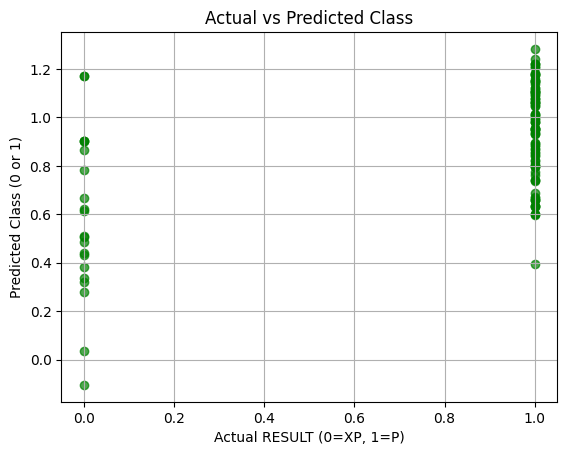

In [329]:
y_pred_class = model.predict(X_test)

plt.scatter(y_test, y_pred_class, alpha=0.7, color='green')
plt.xlabel('Actual RESULT (0=XP, 1=P)')
plt.ylabel('Predicted Class (0 or 1)')
plt.title('Actual vs Predicted Class')
plt.grid(True)
plt.show()
